In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
# sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
sys.path.insert(0, '/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [4]:
pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
pathy=pathMAC

In [5]:
path=pathy+'/data/tempsweep_radial_mac_nodiff__2022-05-01-21-06-20'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])


reading data  /Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/data/tempsweep_radial_mac_nodiff__2022-05-01-21-06-20/tempsweep_radial_mac_nodiff__1/data2022-05-01-20-35-25.h5
reading data  /Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/data/tempsweep_radial_mac_nodiff__2022-05-01-21-06-20/tempsweep_radial_mac_nodiff__5/data2022-05-01-20-56-02.h5
reading data  /Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/data/tempsweep_radial_mac_nodiff__2022-05-01-21-06-20/tempsweep_radial_mac_nodiff__2/data2022-05-01-20-45-35.h5
reading data  /Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/data/tempsweep_radial_mac_nodiff__2022-05-01-21-06-20/tempsweep_radial_mac_nodiff__10/data2022-05-01-21-06-19.h5


In [6]:
df

,theta,freq,SE,error,KFX,KFY,T,nu,intP,FS_point,dispname,t1,t2,SFname,J
0,-2.617994,0.000,3.094649,0.002179,-2.401912,-1.393986,1.0,0.5,2000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_nodiffpeak_theta_-150.0,10.34
1,-2.617994,2.068,3.104704,0.001851,-2.401912,-1.393986,1.0,0.5,2000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_nodiffpeak_theta_-150.0,10.34
2,-2.617994,4.136,3.131910,0.000962,-2.401912,-1.393986,1.0,0.5,2000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_nodiffpeak_theta_-150.0,10.34
3,-2.617994,6.204,3.175866,0.005820,-2.401912,-1.393986,1.0,0.5,2000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_nodiffpeak_theta_-150.0,10.34
4,-2.617994,8.272,3.235698,0.002072,-2.401912,-1.393986,1.0,0.5,2000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_nodiffpeak_theta_-150.0,10.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,-2.617994,144.760,3.379947,0.000246,-2.401912,-1.393986,10.0,0.5,2000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_nodiffpeak_theta_-150.0,10.34
71,-2.617994,146.828,3.384358,0.000240,-2.401912,-1.393986,10.0,0.5,2000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_nodiffpeak_theta_-150.0,10.34
72,-2.617994,148.896,3.388794,0.000223,-2.401912,-1.393986,10.0,0.5,2000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_nodiffpeak_theta_-150.0,10.34
73,-2.617994,150.964,3.393224,0.000226,-2.401912,-1.393986,10.0,0.5,2000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_nodiffpeak_theta_-150.0,10.34


[ 1.  5.  2. 10.]


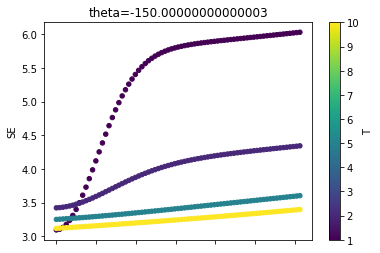

In [7]:
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
    plt.title('theta='+str(th*180/np.pi))
    
print(tss)

[-2.61799388]
0 0 0


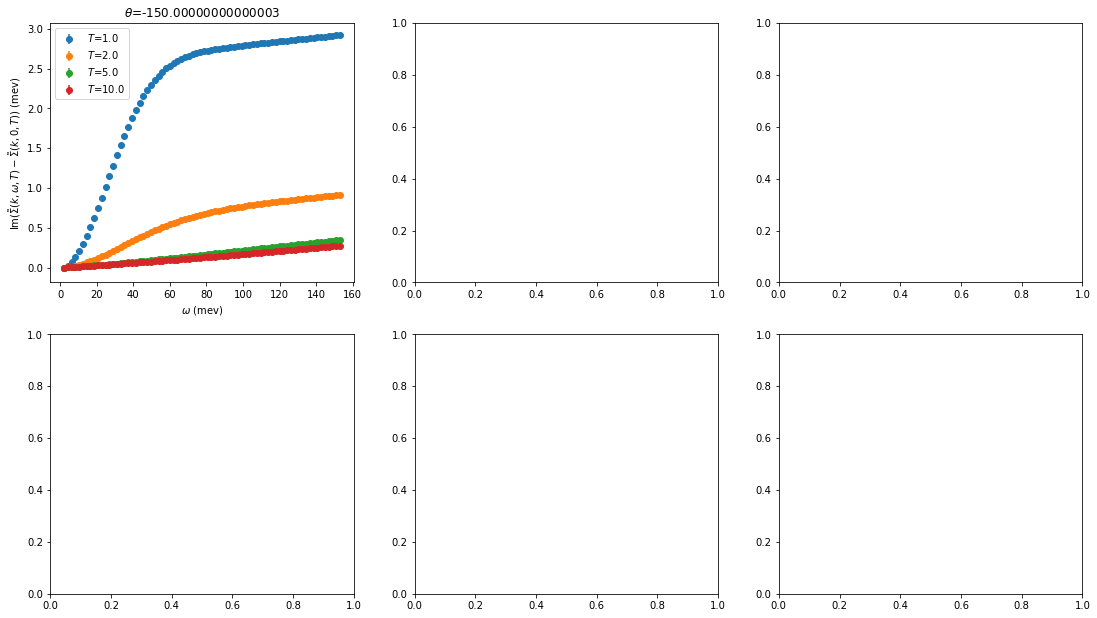

In [9]:
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,2.0,5.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']-df3.iloc[1]['SE']
        
            
        err=df3['error']
        axis[i,j].errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='o')
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    axis[i,j].set_title(r'$\theta$='+str(th*180/np.pi))
    axis[i,j].set_ylabel(r"Im($\tilde{\Sigma}(k,\omega, T)-\tilde{\Sigma}(k,0, T)$) (mev)")
    axis[i,j].set_xlabel(r"$\omega$ (mev)")
    axis[i,j].legend()
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

[-2.6179938779914944]
0 0 0


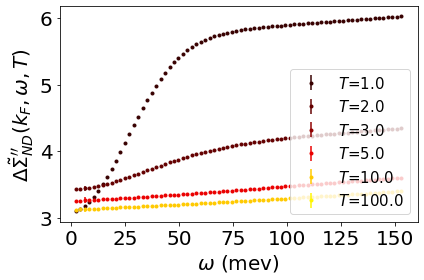

In [15]:
N,M=1,1
figure, axis = plt.subplots(N,M)
# figure.set_size_inches(18.5, 10.5)
thets=[df['theta'].unique()[0]]
print(thets)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,2.0,3.0,5.0,10.0, 100.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))

        x=df3['freq']
        y=df3['SE']#-df3.iloc[1]['SE']

        
            
        err=df3['error']
        if T<50:
            axis.errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15))
        if T>50:
            axis.errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(11/15))
        
        # print(df3.iloc[0]['SE'])
        # a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis.set_ylabel(r"$\Delta \tilde{\Sigma}_{ND}''(k_F,\omega, T)$", size=20)
    axis.set_xlabel(r"$\omega$ (mev)", size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)
    axis.legend(prop={'size': 15}, loc=4)
    plt.tight_layout()
    
# ww=np.linspace(0,205.76600000000002,np.size(integralsee[0]))
# for i in integralsee:
#     plt.plot(ww,i-i[0])
# plt.savefig("imgs/pap_fig4a", dpi=700)

In [16]:

import numpy as np
import Lattice
import StructureFactor
import Dispersion
import matplotlib.pyplot as plt
import time
import sys
import concurrent.futures
import functools
import gc
import pandas as pd
from matplotlib import cm
from matplotlib import pyplot
from scipy.optimize import curve_fit



Machine arg is, FMAC
Machine arg is, FMAC
reading lattice from... ./Lattices/KgridX100.npy
reading lattice from... ./Lattices/KgridY100.npy
Machine arg is, FMAC
started calculating filling for chemical potential and dispersion parameters TB_single_band..
Machine arg is, 
reading lattice from... ./Lattices/KgridX2000.npy
reading lattice from... ./Lattices/KgridY2000.npy
Machine arg is, 
reading lattice from... ./Lattices/KgridX2000.npy
reading lattice from... ./Lattices/KgridY2000.npy
norm of Dos, 42.97045268655724 45.58575006211245
sum of the hist, normed? 42.97045268655724
finished calculating filling for chemical potential
Filling: 0.4931110711866389 .... chemical potential: 23.936856978046194
Machine arg is, 
reading lattice from... ./Lattices/KgridX2000.npy
reading lattice from... ./Lattices/KgridY2000.npy
sum of the hist, normed? 0.9999999999999631
2352 2473
227.96025098055472 -267.41895522225735 23.936856978046194 4000
reading lattice from... ./Lattices/KgridX1000.npy
reading lat

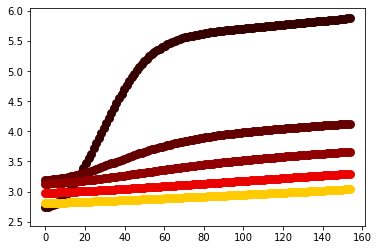

In [29]:
Machine='FMAC'
##########################
##########################
# parameters
##########################
##########################
# # #electronic parameters
J=2*5.17 #in mev
tp1=568/J #in units of Js\
tp2=-tp1*108/568 #/tpp1
##coupling 
U=4000/J
g=100/J
Kcou=g*g/U
# fill=0.67 #van hove
fill=0.5

#rotated FS parameters
# J=2*5.17 #in mev
# tp1=568/J #in units of Js\
# tp2=tp1*0.258 #/tpp1
# ##coupling 
# U=4000/J
# g=100/J
# Kcou=g*g/U
# # fill=0.67 #van hove
# fill=0.35
##params quasicircular and circular FS
# J=2*5.17 #in mev
# tp1=568/J #in units of Js
# tp2=0.065*tp1
# ##coupling 
# U=4000/J
# g=100/J
# Kcou=g*g/U
# fill=0.1
##########################
##########################
# Geometry/Lattice
##########################
##########################
Npoints=1000
Npoints_int_pre, NpointsFS_pre=100,600

save=True
Npoints_diff=1000
latt_dif=Lattice.TriangLattice(Npoints_diff, save,Machine)
l=Lattice.TriangLattice(Npoints_int_pre, save, Machine)
[KX,KY]=l.read_lattice()
# [KX,KY]=l.Generate_lattice_SQ()
Vol_rec=l.Vol_BZ()
l2=Lattice.SQLattice(Npoints, save, Machine)
# [KX2,KY2]=l2.Generate_lattice()
Vol_rec2=l2.Vol_BZ()

Npoints_int=np.size(KX)
ds=Vol_rec/Npoints_int



# ##########################
# ##########################
# # Fermi surface and structure factor
# ##########################
# ##########################
ed=Dispersion.Dispersion_TB_single_band([tp1,tp2],fill)
plt.plot(ed.earr,ed.Dos)
plt.axvline(ed.mu, c='b', lw=1)
plt.axvline(ed.mu+20, c='r', lw=1)



indmin=np.argmin((ed.earr-(ed.mu))**2)
indmax=np.argmin((ed.earr-(ed.mu+15))**2)
print(indmin, indmax)
# freqrange=ed.earr[indmin:indmax]
plt.plot(ed.earr[indmin:indmax],ed.Dos[indmin:indmax])
# plt.axvline(ed.mu-1, c='r', lw=1)
plt.savefig("Dos.png")
plt.close()


print(np.max(ed.earr), np.min(ed.earr), ed.mu, np.size(ed.earr))

nu=ed.earr[indmin:indmax]-ed.mu+0.0001
ome=np.linspace(-2*np.pi, 2*np.pi, 2000)
dome=ome[1]-ome[0]
rhonu=ed.Dos[indmin:indmax]
vals=6
# Tvals=np.linspace(1,10,vals)
# Tvals=np.arange(1,10,1)
Tvals=[1,2,3,5,10,100]
# Tvals=np.linspace(1,100,vals)

def ff3(ome,gam,c):
    return c*np.exp(-gam*(ome**2)/2)

def fexp(ome,b,e, gam):
    regular=-gam*(ome**2)/2-np.log(np.exp(b*(ome-e))+1) 
    FDpart=np.log(b*ome/(1-np.exp(-b*ome)))
    return regular+FDpart

def fppexp(ome, b , e, gam):
    sech=1/np.cosh(b*(ome-e)/2)
    csch=1/np.sinh(b*(ome)/2)
    regular= -gam-(b*sech/2)**2
    FDpart=-1/ome**2 +(b*csch/2)**2
    return regular+FDpart

def saddle(ome,b , e, gam, maxom):
    return np.exp(fexp(ome,b,e, gam))*2*maxom
    
def saddle_2(ome, b , e, gam, maxom):
    sqff2=np.sqrt(np.abs(fppexp(ome, b , e, gam)))
    erfpart=2#special.erf(sqff2*(ome+maxom)/np.sqrt(2))-special.erf(sqff2*(ome-maxom)/np.sqrt(2))
    flucpart=np.sqrt(np.pi/2)*erfpart/sqff2
    return np.exp(fexp(ome,b,e, gam))*flucpart

def saddle_om_ap( b , e, gam):
    c=np.exp(b*e)
    first=(1+c)/(2*b*c)
    num=4*b*b*c+gam+2*c*gam+c*c*gam
    den=b*b*c*c*gam
    sec=np.sqrt(num/den)/2
    return first-sec

def saddle_om_ap_2( b , e, gam):
    c=np.exp(-b*e)
    pre=(1+c)/(2*b)
    cosh=np.cosh(b*e)
    # insid=4*b*b*c/(gam*((1+c)**2))
    insid=2*b*b/(gam*(1+cosh))
    sq=np.sqrt(1+insid)
    return pre*(1-sq)
zerps=np.zeros(vals)
ints=np.zeros(vals)
Jcut=3
integsee=[]
for i,T in enumerate(Tvals):
    SS=StructureFactor.StructureFac_fit_no_diff_peak(T,latt_dif)
    S=[]
    for omega in ome:
        Siav=np.sum(SS.Dynamical_SF(KX,KY,np.abs(omega)))*ds/Vol_rec
        S.append(Siav)
    popt, pcov = curve_fit(ff3, ome, S)
    print('the optimal paramss are',popt)
    integ=[]
    integ_pre=[]
    omes=[]
    omesan=[]
    for e in nu:
        inti_pre=np.trapz(ff3(ome,popt[0],popt[1])/(np.exp((ome-e)/T)+1))*dome
        # integ.append(inti)
        gam=popt[0]
        eta=popt[1]
        omestar=ome[np.argmax(fexp(ome,1/T, e, gam))]
        # omestar=saddle_om_ap_2( 1/T , e, gam)
        maxom=np.max(ome)
        inti=eta*saddle_2(omestar, 1/T , e, gam, maxom)
        print(inti, inti_pre, inti_pre/inti, omestar)
        integ.append(inti)
        integ_pre.append(inti_pre)
        omes.append(omestar)
        omesan.append(saddle_om_ap( 1/T , e, gam))
    intres=np.array(integ)
    intres_pre=np.array(integ_pre)
       
    # expart=np.exp(-nu/T)+1
    # tauinv= (2*np.pi)*(J)*Kcou*Kcou*rhonu*intres*expart
    # tauinv_pre= (2*np.pi)*(J)*Kcou*Kcou*rhonu*intres_pre*expart
    
    # plt.plot(tauinv)
    # plt.plot(tauinv_pre)
    # plt.savefig("integs"+str(T)+".png")
    # plt.plot(omes)
    # plt.plot(omesan)
    # plt.savefig("omestar.png")
    # plt.close()
    expart=np.exp(-nu/T)+1
    tauinv= (2*np.pi)*(J)*Kcou*Kcou*rhonu*intres*expart
    zerps[i]=tauinv[0]
    tauinv=tauinv#-tauinv[0]
    
    plt.scatter(nu*J,tauinv , color=cm.hot(T/15), label='T='+str(T), lw=3)
    integsee.append(tauinv)
        

[-2.6179938779914944]
0 0 0


/var/folders/s3/40l5x__x3hd75xdyv2tqmfyh0000gn/T/ipykernel_32406/2318224076.py:26: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] , fmt='-', color=cm.hot(T/15), ls='None')
/var/folders/s3/40l5x__x3hd75xdyv2tqmfyh0000gn/T/ipykernel_32406/2318224076.py:26: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] , fmt='-', color=cm.hot(T/15), ls='None')
/var/folders/s3/40l5x__x3hd75xdyv2tqmfyh0000gn/T/ipykernel_32406/2318224076.py:26: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] , fmt='-', color

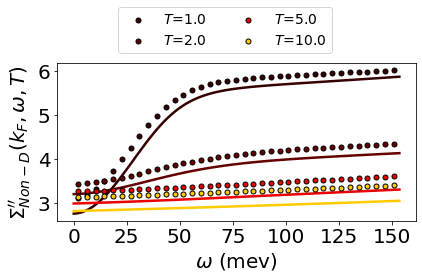

In [33]:
N,M=1,1
figure, axis = plt.subplots(N,M)
# figure.set_size_inches(18.5, 10.5)
thets=[df['theta'].unique()[0]]
print(thets)
df=df.sort_values(by=['freq','T'])
Tlist=[1.0,2.0,5.0,10.0]
# Tlist=[1.0,2.0,3.0,5.0,10.0,100.0]
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in Tlist:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']#-df3.iloc[1]['SE']
        err=df3['error']
        
        if T<50:
            axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] , fmt='-', color=cm.hot(T/15), ls='None')
            axis.scatter(x[1::2],(y[1::2]) , edgecolor='k',  s=25,   label=r'$T$='+str(T),  color=cm.hot(T/15))
        if T>50:
            axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] , fmt='-', color=cm.hot(11/15), ls='None')
            axis.scatter(x[1::2],(y[1::2]) , edgecolor='k', s=25,   label=r'$T$='+str(T),  color=cm.hot(11/15))
            
        
        
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis.set_ylabel(r"$ \Sigma_{Non-D}''(k_F,\omega, T)$", size=20)
    axis.set_xlabel(r"$\omega$ (mev)", size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)
    axis.legend(bbox_to_anchor=(0.15,1.02,1,0.1), prop={'size': 14}, ncol=2)
    plt.tight_layout()
    
ww=np.linspace(nu[0]*J,nu[-1]*J,np.size(integsee[0]))
Tlist=[1.0,2.0,3.0,5.0,10.0,100.0]
index=[0,1,3,4]
for i in index:
    T=Tlist[i]
    if T<50:
        plt.plot(ww,integsee[i], color=cm.hot(T/15), lw=2.5,zorder=0)
    if T>50:
        plt.plot(ww,integsee[i], color=cm.hot(11/15), lw=2.5, zorder=0)
plt.savefig("imgs/pap_fig1f.png", dpi=400)